<a href="https://colab.research.google.com/github/hucarlos08/GEO-ML/blob/main/KernelTrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The problem
So far we have seen classification and regression methods that assume **linear models**.

- Linear models, while easy to train and having analytical solutions, may not be sufficient for solving complex machine learning problems.
- Complex models or transformative techniques are needed to handle data with non-linear relationships and intricate patterns.
- These approaches allow us to capture non-linear dependencies that linear models cannot effectively represent.
- By transforming the data into a different space, we can make it amenable to linear models.
- Transformations help uncover hidden structures and relationships that may not be apparent in the original feature space.
- Utilizing advanced models and transformations expands our capabilities and improves prediction accuracy and flexibility.

Text(0.5, 1.0, 'Transformed Space')

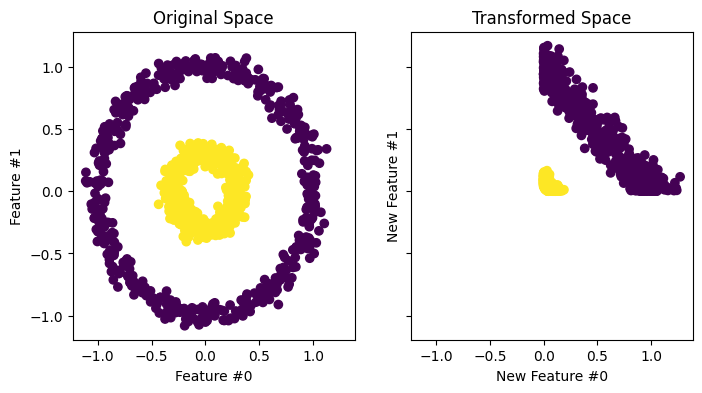

In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)

def phi(x:np.array) -> np.array:
  return np.array([x[0]**2, x[1]**2])

X_new  = np.apply_along_axis(phi, 1, X)


plt, (original_ax, transform_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

original_ax.scatter(X[:, 0], X[:, 1], c=y)
original_ax.set_ylabel("Feature #1")
original_ax.set_xlabel("Feature #0")
original_ax.set_title("Original Space")

transform_ax.scatter(X_new[:, 0], X_new[:, 1], c=y)
transform_ax.set_ylabel("New Feature #1")
transform_ax.set_xlabel("New Feature #0")
transform_ax.set_title("Transformed Space")

Text(0.5, 1.0, 'Transformed Space')

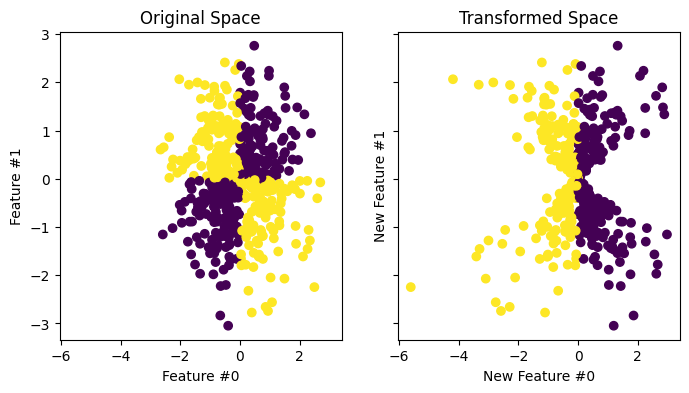

In [2]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(0)
X = rng.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

def phi(x:np.array) -> np.array:
  return np.array([x[0]*x[1], x[1]])


X_new  = np.apply_along_axis(phi, 1, X)

plt, (original_ax, transform_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

original_ax.scatter(X[:, 0], X[:, 1], c=y)
original_ax.set_ylabel("Feature #1")
original_ax.set_xlabel("Feature #0")
original_ax.set_title("Original Space")


transform_ax.scatter(X_new[:, 0], X_new[:, 1], c=y)
transform_ax.set_ylabel("New Feature #1")
transform_ax.set_xlabel("New Feature #0")
transform_ax.set_title("Transformed Space")

## ¿Problems?

# Kernel Methods

## The ideas
The **kernel trick** is a technique used in machine learning, particularly with support vector machines (SVMs) and kernel methods. It allows data to be transformed from a lower-dimensional space to a higher-dimensional space without explicitly calculating the coordinates in the higher-dimensional space.

The intuition behind the kernel trick is that many machine learning algorithms work well with linear operations in the input space. However, real-world data is often not linearly separable in its original form. By using a kernel function, the data points are implicitly mapped into a higher-dimensional feature space, where they may become linearly separable.

The key insight is that the dot product of data points in the transformed feature space can be expressed solely in terms of their dot product in the original feature space. This means that the kernel function allows us to compute the transformed dot product directly, without needing to calculate the coordinates of the data points in the higher-dimensional space.

The kernel trick offers computational advantages by avoiding the explicit computation of transformed feature vectors, which can be computationally expensive for high-dimensional or infinite-dimensional spaces. By leveraging the kernel trick, algorithms like SVMs can effectively handle complex data sets while still relying on simple linear operations in the original feature space.

## Kernel method as non parametric formulation
**Nonparametric methods for regression and classificatio**n. Such methods do not assume a fixed parametric form for the prediction function, but instead try to estimate the function itself (rather than the parameters) directly from data.

The key idea behind this concept is that we have a fixed set of $N$ points, denoted as $\{\mathbf x_n\}$, and their corresponding function values $\{y_n\}$. These points represent our training data, and our goal is to predict the function value at a new point, $x_∗$.

To make this prediction, we need to compare how **similar** $x_∗$ is to each of the $N$ training points. By assessing this similarity, we can infer the relationship between $\mathbf x_∗$ and the training points. Once we determine the similarity, we can predict that the function value at $\mathbf x_∗$, denoted as $f(\mathbf x_∗)$, is a weighted combination of the function values at the training points, $\{f(\mathbf x_n)\}$.

In other words, instead of directly estimating the function at $\mathbf x_∗$, we utilize the known function values at the training points to make an informed prediction. This approach requires us to "remember" the entire training set, denoted as $D = \{(\mathbf x_n, y_n)\}$, in order to make accurate predictions during the testing phase. We cannot compress the training set into a fixed-sized parameter vector since we rely on the individual training points and their associated function values.

Therefore, to predict $f(\mathbf x_∗)$ accurately, we compare the similarity between $\mathbf x_∗$ and the training points, and we leverage this comparison to estimate the weighted combination of the known function values at the training points. This concept highlights the importance of retaining the training data during the prediction phase and the inability to reduce it to a compact parameter vector.

## Mercer kernels
The key to nonparametric methods is that we need a way to encode prior knowledge about the similarity of two input vectors. Thats it
- Nonparametric methods require encoding prior knowledge about the similarity between input vectors.
- Similarity between vectors, such as $\mathbf x_i$ and $\mathbf x_j$, encourages similar predicted outputs, $f(\mathbf x_i)$ and $f(\mathbf x_j)$.
- The notion of similarity is defined using a kernel function. Here we consider a **Mercer kernel**, also called a positive definite kernel. This is any symmetric function $k : X \times X \to \mathbb R^+$ such that:
$$
\sum_{i=1}^N\sum_{j=1}^N k(\mathbf x_i, \mathbf x_j)c_ic_j\geq 0
$$
for any set of $N$ points $\mathbf x_i\in X$, and any choice of numbers $c_i\in\mathbb R$. (We assume $K(\mathbf x_i,\mathbf x_j) > 0$, so that we can only achieve equality in the above equation if $c_i = 0$ for all $i$.)
- Using a kernel function, we can compute the dot product between data points in the transformed feature space without computing the coordinates explicitly.
- The kernel trick enables efficient computations in higher-dimensional spaces and facilitates non-linear decision boundaries in classification or regression tasks.


## Mercer’s theorem

Another way to understand this condition is the following. Given a set of $N$ datapoints, let us
define the Gram matrix as the following $N\times N$ similarity matrix:
$$
K = \begin{bmatrix}
    k(\mathbf{x}_1, \mathbf{x}_1) & k(\mathbf{x}_1, \mathbf{x}_2) & \dots  & k(\mathbf{x}_1, \mathbf{x}_n) \\
    k(\mathbf{x}_2, \mathbf{x}_1) & k(\mathbf{x}_2, \mathbf{x}_2) & \dots  & k(\mathbf{x}_2, \mathbf{x}_n) \\
    \vdots & \vdots & \ddots & \vdots \\
    k(\mathbf{x}_n, \mathbf{x}_1) & k(\mathbf{x}_n, \mathbf{x}_2) & \dots  & k(\mathbf{x}_n, \mathbf{x}_n)
\end{bmatrix}
$$

We say that $k$ is a Mercer kernel iff the Gram matrix is positive definite for any set of (distinct) inputs $\{\mathbf x_i\}^N_{i=1}$.

Recall that any positive definite matrix $K$ can be represented using an eigen-decomposition of the form $K = U^T\Lambda U$, where $\Lambda$ is a diagonal matrix of eigenvalues $\lambda_i > 0$, and $U$ is a matrix containing the eigenvectors. Now consider element $(i,j)$ of K:

<br>
$$
k_{ij} = (\Lambda^{\frac{1}{2}} U_{:i})^T(\Lambda^{\frac{1}{2}} U_{:j})
$$
<br>

where $U_{:i}$ is the $i$'th column of $U$. If we define $\phi(\mathbf x_i)=\Lambda^{\frac{1}{2}} U_{:i}$, then we can write:

<br>
$$
k_{ij} =\phi(\mathbf x_i)^T\phi(\mathbf x_j)=\sum_{m}\phi_m(\mathbf x_i)\phi_m(\mathbf x_j)
$$
<br>

Thus we see that the entries in the kernel matrix can be computed by performing an inner product of some feature vectors that are implicitly defined by the eigenvectors of the kernel matrix. This idea can be generalized to apply to kernel functions, not just kernel matrices; this result is known as **Mercer’s theorem**.

### Example
For example, consider the quadratic kernel

<br>
$$
k(\mathbf x, \mathbf x')=⟨\mathbf x, \mathbf x'⟩^2=(x_1x'_1 + x_2x'_2)^2.
$$
<br>

We can write $k(\mathbf x, \mathbf x')=\phi(\mathbf x)^T\phi(\mathbf x')$ if we define $\phi(\mathbf x)=\phi(x_1, x_2) = [x_1^2, \sqrt{2}x_1x_2, x_2^2]\in\mathbb R^3$

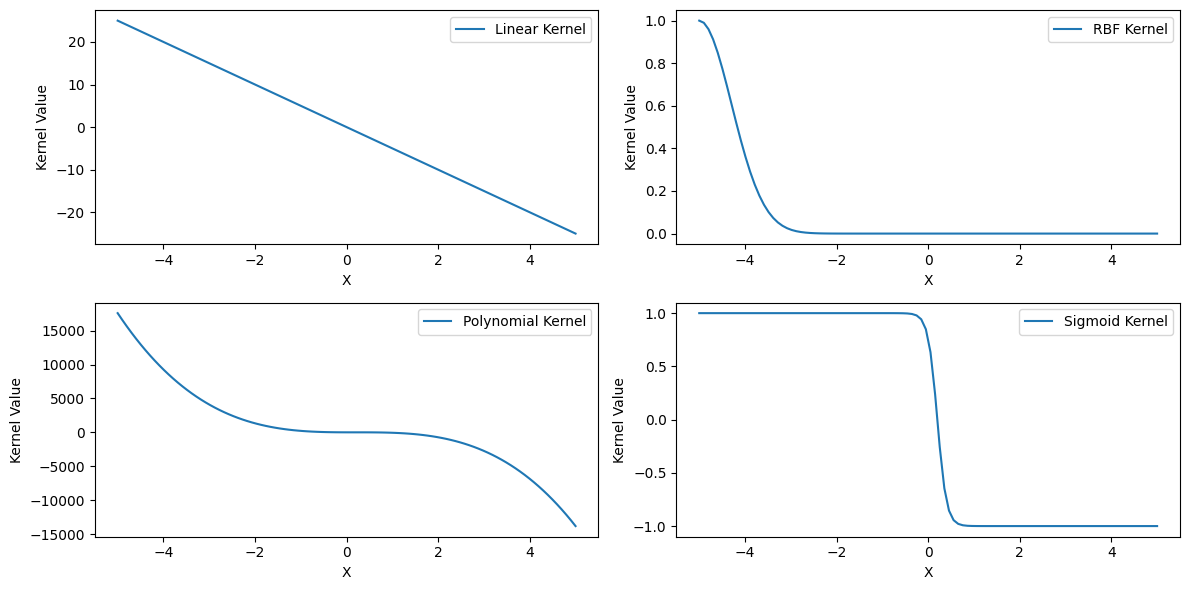

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_kernels

# Define the input data
X = np.linspace(-5, 5, 100).reshape(-1, 1)

# Define the Mercer kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
labels = ['Linear Kernel', 'RBF Kernel', 'Polynomial Kernel', 'Sigmoid Kernel']

# Plot the Mercer kernels
plt.figure(figsize=(12, 6))
for i, kernel in enumerate(kernels):
    K = pairwise_kernels(X, metric=kernel)
    plt.subplot(2, 2, i+1)
    plt.plot(X, K[0], label=labels[i])
    plt.xlabel('X')
    plt.ylabel('Kernel Value')
    plt.legend()

plt.tight_layout()
plt.show()


## New Kernels

Given two valid kernels $k_1(\mathbf x, \mathbf x′)$ and $k_2(\mathbf x, \mathbf x′)$, we can create a new kernel using any of the following methods:
1. $k(\mathbf x, \mathbf x′) = c\cdot k_1(\mathbf x, \mathbf x′)$, for any constant $c > 0$.
1. $k(\mathbf x, \mathbf x′) = f(\mathbf x)\cdot k_1(\mathbf x,\mathbf x′)\cdot f(\mathbf x′)$, for any function $f$
1. $k(\mathbf x, \mathbf x′) = q(k_1(x, x′))$ for any function polynomial $q$ with nonneg. coef.
1. $k(\mathbf x, \mathbf x′) = \exp(k_1(\mathbf x, \mathbf x′))$
1. $k(\mathbf x, \mathbf x′) = \mathbf x^TA\mathbf x′$, for any psd matrix $A$

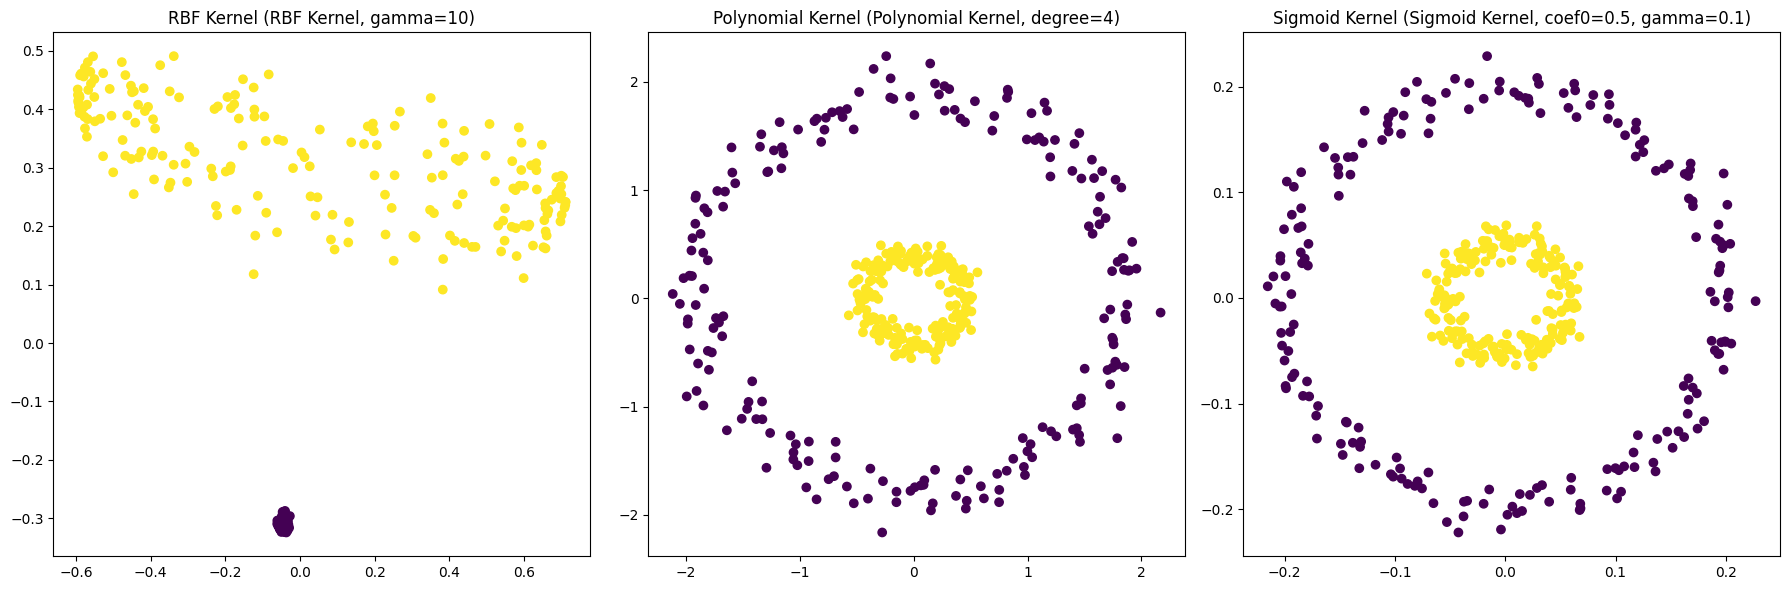

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

# Generate a non-linear dataset
X, y = make_circles(n_samples=400, factor=0.3, noise=0.05, random_state=0)

# Perform Kernel PCA with different kernels
kernels = ['rbf', 'poly', 'sigmoid']
kernel_labels = ['RBF Kernel', 'Polynomial Kernel', 'Sigmoid Kernel']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# RBF Kernel with modified gamma parameter
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=10)
X_kpca_rbf = kpca_rbf.fit_transform(X)

axs[0].scatter(X_kpca_rbf[:, 0], X_kpca_rbf[:, 1], c=y, cmap='viridis')
axs[0].set_title(kernel_labels[0] + ' (RBF Kernel, gamma=10)')

# Polynomial Kernel with modified degree parameter
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=5)
X_kpca_poly = kpca_poly.fit_transform(X)

axs[1].scatter(X_kpca_poly[:, 0], X_kpca_poly[:, 1], c=y, cmap='viridis')
axs[1].set_title(kernel_labels[1] + ' (Polynomial Kernel, degree=4)')

# Sigmoid Kernel with modified coef0 and gamma parameters
kpca_sigmoid = KernelPCA(n_components=2, kernel='sigmoid', coef0=2, gamma=0.5)
X_kpca_sigmoid = kpca_sigmoid.fit_transform(X)

axs[2].scatter(X_kpca_sigmoid[:, 0], X_kpca_sigmoid[:, 1], c=y, cmap='viridis')
axs[2].set_title(kernel_labels[2] + ' (Sigmoid Kernel, coef0=0.5, gamma=0.1)')

plt.tight_layout()
plt.show()
